# Portfolio Similarity

![img](./media/similarity-01.png)

 ![img](./media/similarity-02.png)

 ![img](./media/similarity-03.png)

![img](./media/similarity-04.png) 

![img](./media/similarity-05.png) 

 ![img](./media/similarity-06.png)

 ![img](./media/similarity-07.png)

 ![img](./media/similarity-08.png)

![img](./media/similarity-09.png)

 ![img](./media/similarity-10.png)

  ![img](./media/similarity-11.png)

  ![img](./media/similarity-12.png)

  ![img](./media/similarity-13.png)

  ![img](./media/similarity-14.png)

 ![img](./media/similarity-15.png) 

In [310]:
import math
import typing

import networkx as nx
import hvplot.networkx as hvnx
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import random

In [526]:
COMPANY_COLOR: str = '#2ecc71'
COMPANY_SIZE: int = 1500
PERSON_COLOR: str = '#337ab7'
PERSON_SIZE: int = 500
INVESTMENT_COLOR: str = '#27ae60'
LABEL_COLOR: str = '#ededed'
BINS: int = 30

INDUSTRIES: list = [
    'health',
    'finance',
    'marketing',
    'entertainment',
    'aerospace',
    'transport',
    'computer',
    'telecommunication',
    'agriculture',
    'construction',
    'education',
    'pharmaceutical',
    'food',
    'hospitality',
    'news',
    'energy',
    'manufacturing',
    'music',
    'mining',
    'electronics',
]

In [515]:
def poisson(mean: float, size: int) -> np.ndarray:
    """
    Generates a random array from a Poisson distribution.
    """
    return sc.random.poisson(lam=mean, size=size)


def gauss(mean: float, std: float, size: int, minimum: float = 0, maximum: float = 1) -> np.ndarray:
    """
    Generates a random array from a truncated Normal distribution.
    """
    return sc.stats.truncnorm.rvs(
        (minimum - mean) / std,
        (maximum - mean) / std,
        loc=mean,
        scale=std,
        size=size
    )


def sigmoid(x: float) -> float:
    """
    Calculates sigmoid function.
    """
    return 1 / (1 + math.exp(-x))

# Generative Model

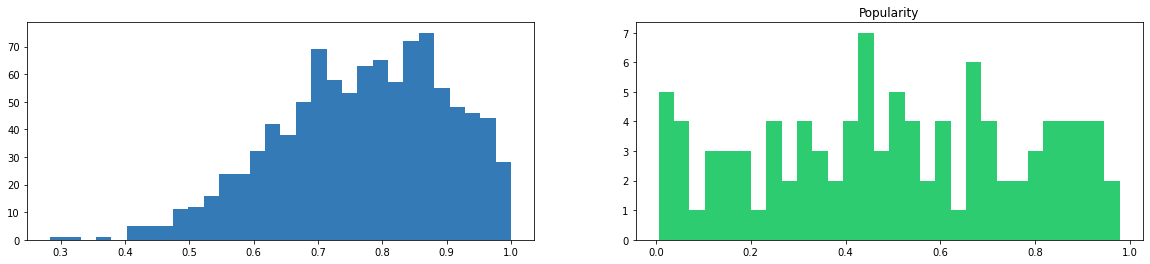

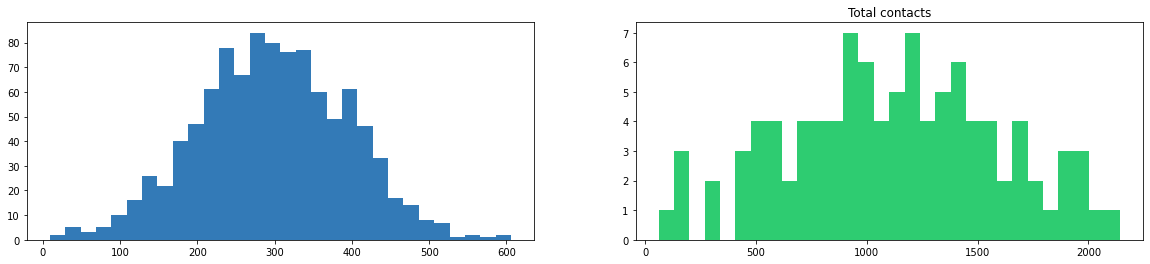

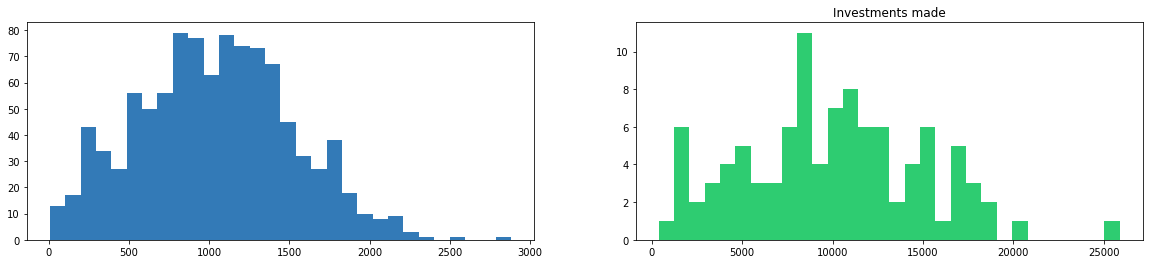

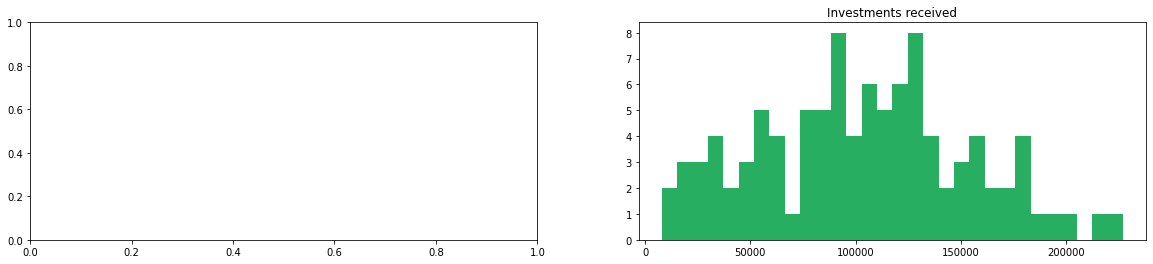

:Overlay
   .Graph.I  :Graph   [start,end]   (color,type,edge_line_color)
   .Labels.I :Labels   [x,y]   (text)

In [550]:
TOTAL_PERSONS: int = 1000
TOTAL_COMPANIES: int = 100
TOTAL_INVESTMENTS: int = 500
TOTAL_CONTACTS: int = 2000
TOTAL_PARTICIPATIONS: int = 100
TOTAL_AFFILIATIONS: int = 500

all_persons: list = []
all_companies: list = []
all_investments: list= []
all_contacts: list = []

G: nx.Graph = nx.Graph()

# Persons.
invested_persons: np.ndarray = gauss(mean=1000, std=500, size=TOTAL_PERSONS, minimum=0, maximum=5000)
investments_persons: np.ndarray = poisson(mean=2, size=TOTAL_PERSONS)
contacts_persons: np.ndarray = gauss(mean=300, std=100, size=TOTAL_PERSONS, minimum=0, maximum=5000)
popularity_persons: np.ndarray = gauss(mean=0.8, std=0.15, size=TOTAL_PERSONS, minimum=0, maximum=1)
for i in range(TOTAL_PERSONS):
    person_id: str = f'person-{i}'
    all_persons.append(person_id)
    G.add_node(
        person_id,
        type='person',
        name=f'p{i}',
        color=PERSON_COLOR,
        size=PERSON_SIZE,
        invested=invested_persons[i],
        contacts=contacts_persons[i],
        popularity=popularity_persons[i],
        investments=investments_persons[i],
    )

# Companies.
invested_companies: np.ndarray = gauss(mean=10000, std=5000, size=TOTAL_COMPANIES, minimum=0, maximum=50000)
received_companies: np.ndarray = gauss(mean=100000, std=50000, size=TOTAL_COMPANIES, minimum=0, maximum=500000)
investments_companies: np.ndarray = poisson(mean=10, size=TOTAL_COMPANIES)
investors_companies: np.ndarray = poisson(mean=10, size=TOTAL_COMPANIES)
contacts_companies: np.ndarray = gauss(mean=1000, std=500, size=TOTAL_COMPANIES, minimum=0, maximum=10000)
popularity_companies: np.ndarray = gauss(mean=0.5, std=0.45, size=TOTAL_COMPANIES, minimum=0, maximum=1)
for i in range(TOTAL_COMPANIES):
    company_id: str = f'company-{i}'
    all_companies.append(company_id)
    G.add_node(
        company_id,
        type='company',
        name=f'c{i}',
        color=COMPANY_COLOR,
        size=COMPANY_SIZE,
        industry=random.choice(INDUSTRIES),
        invested=received_companies[i],
        received=received_companies[i],
        contacts=contacts_companies[i],
        popularity=popularity_companies[i],
        investments=investments_companies[i],
        investors=investors_companies[i],
    )

# Investments.
sizes_investments: np.ndarray = sc.random.poisson(lam=1000, size=TOTAL_INVESTMENTS) 
for i in range(TOTAL_INVESTMENTS):
    company_id: int = random.randint(0, TOTAL_COMPANIES - 1)
    person_id: int = random.randint(0, TOTAL_PERSONS - 1)
    investment_id: tuple = (f'person-{person_id}',  f'company-{company_id}')
    all_investments.append(investment_id)
    G.add_edge(
        *investment_id,
        type='investment',
        size=sizes_investments[i],
        color=INVESTMENT_COLOR,
    )

# Participations.
sizes_participations: np.ndarray = sc.random.poisson(lam=10000, size=TOTAL_PARTICIPATIONS) 
for i in range(TOTAL_PARTICIPATIONS):
    company_id: int = random.randint(0, TOTAL_COMPANIES - 1)
    other_id: int = random.randint(0, TOTAL_COMPANIES - 1)
    investment_id: tuple = (f'company-{company_id}',  f'company-{other_id}')
    all_investments.append(investment_id)
    G.add_edge(
        *investment_id,
        type='participation',
        size=sizes_participations[i],
        color=INVESTMENT_COLOR,
    )

# Contacts.
relationships_contacts: np.ndarray = gauss(mean=0.5, std=0.45, size=TOTAL_CONTACTS, minimum=0, maximum=1)
for i in range(TOTAL_CONTACTS):
    person_id: int = random.randint(0, TOTAL_PERSONS - 1)
    other_id: int = random.randint(0, TOTAL_PERSONS - 1)
    contact_id: tuple = (f'person-{person_id}',  f'person-{other_id}')
    all_contacts.append(contact_id)
    G.add_edge(
        *contact_id,
        type='contact',
        relationship=relationships_contacts[i],
        color=PERSON_COLOR,
    )

# Affiliations.
relationships_affiliations: np.ndarray = gauss(mean=0.8, std=0.5, size=TOTAL_AFFILIATIONS, minimum=0, maximum=1)
for i in range(TOTAL_AFFILIATIONS):
    person_id: int = random.randint(0, TOTAL_PERSONS - 1)
    company_id: int = random.randint(0, TOTAL_COMPANIES - 1)
    affiliation_id: tuple = (f'company-{company_id}',  f'person-{other_id}')
    all_contacts.append(affiliation_id)
    G.add_edge(
        *affiliation_id,
        type='affiliation',
        relationship=relationships_affiliations[i],
        color=COMPANY_COLOR,
    )

# Popularity graph
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.hist(x=popularity_persons, bins=BINS, color=PERSON_COLOR)
ax2.hist(x=popularity_companies, bins=BINS, color=COMPANY_COLOR)
plt.title('Popularity')
plt.show()

# Contacts graph
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.hist(x=contacts_persons, bins=BINS, color=PERSON_COLOR)
ax2.hist(x=contacts_companies, bins=BINS, color=COMPANY_COLOR)
plt.title('Total contacts')
plt.show()

# Invested capital graph
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.hist(x=invested_persons, bins=BINS, color=PERSON_COLOR)
ax2.hist(x=invested_companies, bins=BINS, color=COMPANY_COLOR)
plt.title('Investments made')
plt.show()

# Invested capital graph
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax2.hist(x=received_companies, bins=BINS, color=INVESTMENT_COLOR)
plt.title('Investments received')
plt.show()

# Network graph
positions: dict = nx.spring_layout(G)
nodes: list = list(positions.keys())
edges: list = G.edges
colors_by_edge: dict = nx.get_edge_attributes(G, 'color')
labels_by_node: dict = nx.get_node_attributes(G, 'name')
colors_by_node: dict = nx.get_node_attributes(G, 'color')
sizes_by_node: dict = nx.get_node_attributes(G, 'size')
edge_colors: list = [colors_by_edge[edge] for edge in edges]
node_colors: list = [colors_by_node[node] for node in nodes]
node_sizes: list = [sizes_by_node[node] for node in nodes]
hvnx.draw(
    G,
    pos=positions,
    arrows=False,
    labels=labels_by_node,
    edge_color=edge_colors,
    node_color=node_colors,
    node_size=node_sizes,
    font_color=LABEL_COLOR,
)

# Dynamic Programming

![img](./media/convergence2.jpg)

![img](./media/convergence.jpg)

Epoch: 0
Epoch: 2
Epoch: 4
Epoch: 6
Epoch: 8
Epoch: 10
Epoch: 12
Epoch: 14
Epoch: 16
Epoch: 18


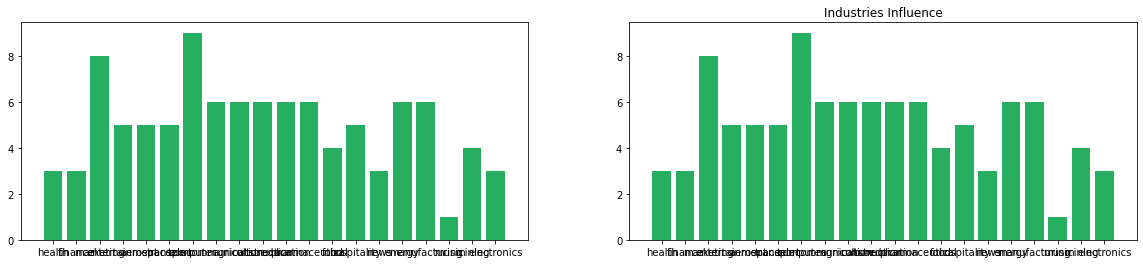

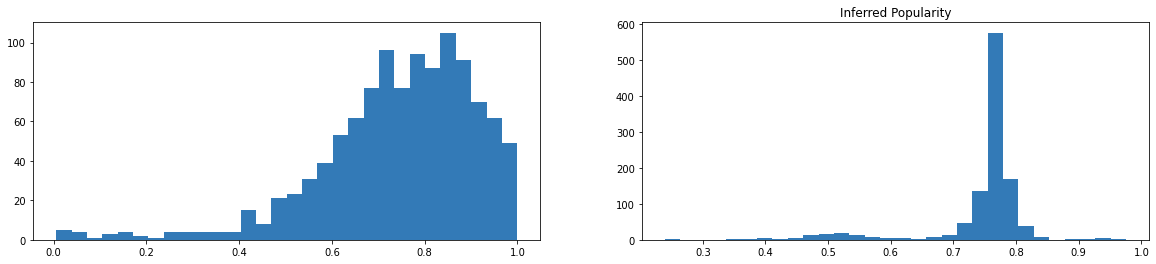

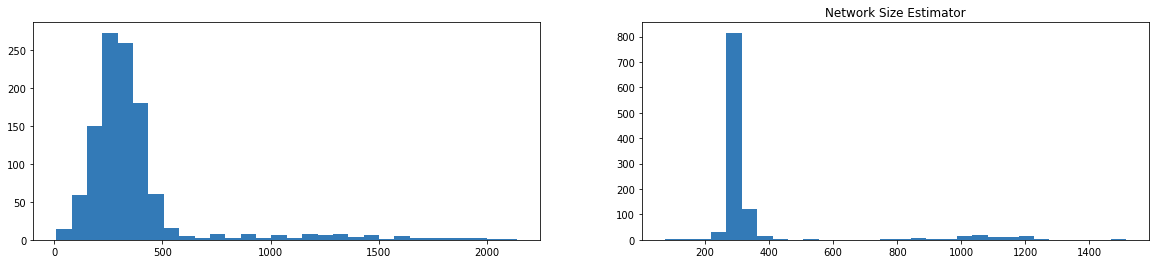

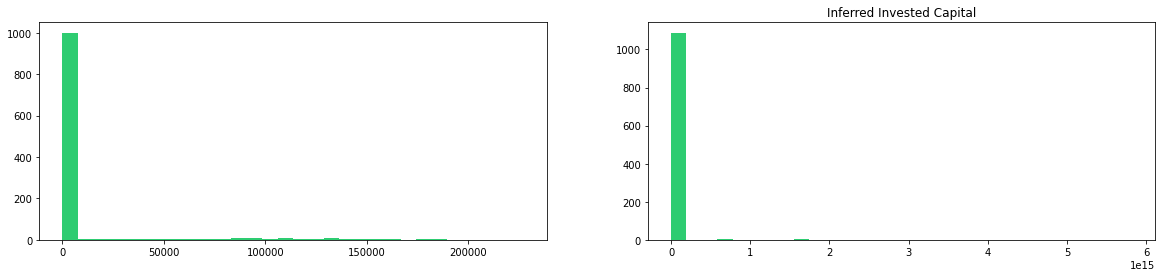

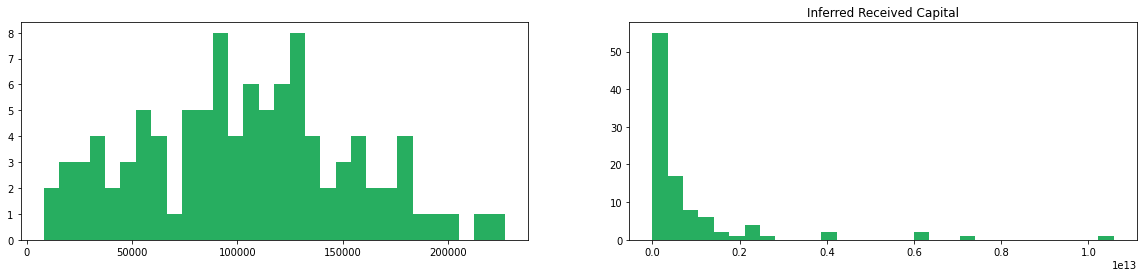

In [560]:
EPOCHS: int = 20
LEARNING_RATE: float = 0.3

# Nodes.
type_by_node: dict = nx.get_node_attributes(G, 'type')
popularity_by_node: dict = nx.get_node_attributes(G, 'popularity')
investments_by_node: dict = nx.get_node_attributes(G, 'investments')
contacts_by_node: dict = nx.get_node_attributes(G, 'contacts')
invested_by_node: dict = nx.get_node_attributes(G, 'invested')
received_by_node: dict = nx.get_node_attributes(G, 'received')
industries_by_company: dict = nx.get_node_attributes(G, 'industry')
industries_by_node: dict = {
    node: {
        industry: 1 if industries_by_company.get(node) == industry else 0
        for industry in INDUSTRIES
    }
    for node in G.nodes
}

# Edges.
type_by_edge: dict = nx.get_edge_attributes(G, 'type')
relationship_by_edge: dict = nx.get_edge_attributes(G, 'relationship')
investment_size_by_edge: dict = nx.get_edge_attributes(G, 'size')

investment_size_mean: float = np.mean(list(investment_size_by_edge.values()))
investment_size_std: float = np.std(list(investment_size_by_edge.values()))

# Initial state snapshot.
initial_popularity: list = list(popularity_by_node.values())
initial_invested: list = list(filter(lambda x: x > 0, invested_by_node.values()))
initial_received: list = list(filter(lambda x: x > 0, received_by_node.values()))
initial_contacts: list = list(contacts_by_node.values())
initial_investments: list = list(investments_by_node.values())
initial_industries: dict = {
    industry: sum(industries[industry] for industries in industries_by_node.values())
    for industry in INDUSTRIES
}

for epoch in range(EPOCHS):

    if not epoch % int(EPOCHS / 10):
        print("Epoch:", epoch)

    for edge in G.edges:

        if type_by_edge[edge] == 'contact' or type_by_edge[edge] == 'affiliation':
            
            # The adjustment is stronger for strongly connected nodes.
            relationship: float = relationship_by_edge[edge]
            learning_rate: float = LEARNING_RATE * relationship

            # Adjusting popularity based on discounted popularity.
            popularity1: float = popularity_by_node[edge[0]]
            popularity2: float = popularity_by_node[edge[1]]
            average: float = (popularity1 + popularity2) / 2
            popularity_by_node[edge[0]]: float = (1 - learning_rate) * popularity1 \
                                               + learning_rate * average
            popularity_by_node[edge[1]]: float = (1 - learning_rate) * popularity2 \
                                               + learning_rate * average
                
            # Adjusting network size based on discounted network size.
            network1: float = contacts_by_node[edge[0]]
            network2: float = contacts_by_node[edge[1]]
            average: float = (network1 + network2) / 2
            contacts_by_node[edge[0]]: float = (1 - learning_rate) * network1 \
                                             + learning_rate * average
            contacts_by_node[edge[1]]: float = (1 - learning_rate) * network2 \
                                             + learning_rate * average
            

        if type_by_edge[edge] == 'investment' or type_by_edge[edge] == 'participation':

            # The adjustment is stronger for strongly connected nodes.
            investment: float = sigmoid((investment_size_by_edge[edge] - investment_size_mean) \
                             / investment_size_std)
            learning_rate: float = LEARNING_RATE * investment

            # Adjusting invested capital based on discounted invested capital.
            invested1: float = invested_by_node[edge[0]]
            invested2: float = invested_by_node[edge[1]]
            invested_by_node[edge[0]] += invested1 * learning_rate
            invested_by_node[edge[1]] += invested1 * learning_rate

            # Adjusting received capital based on discounted received capital.
            if type_by_edge[edge] == 'participation':
                received1: float = received_by_node[edge[0]]
                received2: float = received_by_node[edge[1]]
                received_by_node[edge[0]] += received2 * learning_rate
                received_by_node[edge[1]] += received1 * learning_rate
        
            # Adjusting total investments based on discounted total investments.
            investments1: float = investments_by_node[edge[0]]
            investments2: float = investments_by_node[edge[1]]
            average: float = (investments1 + investments2) / 2
            investments_by_node[edge[0]]: float = (1 - learning_rate) * investments1 \
                                                + learning_rate * average
            investments_by_node[edge[1]]: float = (1 - learning_rate) * investments2 \
                                                + learning_rate * average
        
        # Adjusting industries based on discounted industries.
        industries1: dict = industries_by_node[edge[0]]
        industries2: dict = industries_by_node[edge[1]]
        for industry in INDUSTRIES:
            industry1: float = industries1[industry]
            industry2: float = industries2[industry]
            average: float = (industry1 + industry2) / 2
            industries_by_node[edge[0]][industry] = (1 - learning_rate) * industry1 \
                                                  + learning_rate * average
            industries_by_node[edge[1]][industry] = (1 - learning_rate) * industry2 \
                                                  + learning_rate * average

# Final state snapshot.
final_popularity: list = list(popularity_by_node.values())
final_invested: list = list(filter(lambda x: x > 0, invested_by_node.values()))
final_received: list = list(filter(lambda x: x > 0, received_by_node.values()))
final_contacts: list = list(contacts_by_node.values())
final_investments: list = list(investments_by_node.values())
final_industries: dict = {
    industry: sum(industries[industry] for industries in industries_by_node.values())
    for industry in INDUSTRIES
}

# Safety check
assert initial_popularity != final_popularity
assert initial_invested != final_invested
assert initial_received != final_received
assert initial_contacts != final_contacts
assert initial_investments != final_investments
assert initial_industries != final_industries
    
# Industries graph.
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.bar(list(initial_industries.keys()), list(initial_industries.values()), color=INVESTMENT_COLOR)
ax2.bar(list(final_industries.keys()), list(final_industries.values()), color=INVESTMENT_COLOR)
plt.title('Industries Influence')
plt.show()


# Popularity graph.
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.hist(x=initial_popularity, bins=BINS, color=PERSON_COLOR)
ax2.hist(x=final_popularity, bins=BINS, color=PERSON_COLOR)
plt.title('Inferred Popularity')
plt.show()

# Network size graph.
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.hist(x=initial_contacts, bins=BINS, color=PERSON_COLOR)
ax2.hist(x=final_contacts, bins=BINS, color=PERSON_COLOR)
plt.title('Network Size Estimator')
plt.show()

# Invested capital graph.
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.hist(x=initial_invested, bins=BINS, color=COMPANY_COLOR)
ax2.hist(x=final_invested, bins=BINS, color=COMPANY_COLOR)
plt.title('Inferred Invested Capital')
plt.show()

# Received capital graph.
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.hist(x=initial_received, bins=BINS, color=INVESTMENT_COLOR)
ax2.hist(x=final_received, bins=BINS, color=INVESTMENT_COLOR)
plt.title('Inferred Received Capital')
plt.show()

# Vectorization

In [623]:
def get_person_array(node_id: str) -> dict:
    """
    Returns a dictionary representation of a Person.
    """
    return {
        'name': node_id,
        'popularity': popularity_by_node[node_id],
        'invested': invested_by_node[node_id],
        'contacts': contacts_by_node[node_id],
        'investments': investments_by_node[node_id],
        **{
            industry: value
            for industry, value in industries_by_node[node_id].items()
        }
    }

In [679]:
def get_company_array(node_id: str) -> dict:
    """
    Returns a dictionary representation of a Company.
    """
    return {
        'name': node_id, 
        'popularity': popularity_by_node[node_id],
        'invested': invested_by_node[node_id],
        'received': received_by_node[node_id],
        'contacts': contacts_by_node[node_id],
        'investments': investments_by_node[node_id],
        **{
            industry: value
            for industry, value in industries_by_node[node_id].items()
        }
    }

In [759]:
persons: pd.DataFrame = pd.DataFrame([
    get_person_array(node)
    for node in G.nodes
    if node.startswith('person-')
])
# Normalizing all values between 0 and 1.
persons['investments'] = (persons['investments'] - persons['investments'].mean()) / persons['investments'].std()
persons['invested'] = (persons['invested'] - persons['invested'].mean()) / persons['invested'].std()
persons['contacts'] = (persons['contacts'] - persons['contacts'].mean()) / persons['contacts'].std()
# Assigning distinct weights to different attributes.
for industry in INDUSTRIES:
    persons[industry] *= 0.5
print(persons.shape)
persons.head()

(1000, 25)


,name,popularity,invested,contacts,investments,health,finance,marketing,entertainment,aerospace,...,education,pharmaceutical,food,hospitality,news,energy,manufacturing,music,mining,electronics
0,person-0,0.833850,0.237307,0.556007,1.246530,0.001237,0.001206,0.003244,0.002224,0.002167,...,0.012973,0.002355,0.002044,0.002750,0.001245,0.002823,0.002460,0.000500,0.003008,0.001906
1,person-1,0.743882,-0.058533,0.860328,0.653572,0.001530,0.001146,0.003805,0.002983,0.002381,...,0.003392,0.002569,0.001737,0.005144,0.002935,0.003102,0.002626,0.000534,0.002454,0.001193
2,person-2,0.772974,-0.089157,-1.015560,-1.154614,0.000566,0.000375,0.001370,0.000601,0.000401,...,0.000690,0.001134,0.001094,0.000504,0.000508,0.000515,0.000830,0.000231,0.000420,0.000230
3,person-3,0.773734,0.093562,0.006698,1.436889,0.001444,0.003734,0.003491,0.002419,0.004019,...,0.003441,0.002704,0.001783,0.002716,0.001474,0.003586,0.003257,0.000682,0.002451,0.001623
4,person-4,0.788023,-0.091760,-0.270365,0.237428,0.000803,0.001375,0.003053,0.001680,0.001814,...,0.001658,0.001743,0.001950,0.001464,0.000709,0.001692,0.002199,0.000266,0.001393,0.001628


In [760]:
df: pd.DataFrame = pd.DataFrame([
    get_company_array(node)
    for node in G.nodes
    if node.startswith('company-')
])
# Normalizing all values between 0 and 1.
companies['investments'] = (companies['investments'] - companies['investments'].mean()) / companies['investments'].std()
companies['received'] = (companies['received'] - companies['received'].mean()) / companies['received'].std()
companies['invested'] = (companies['invested'] - companies['invested'].mean()) / companies['invested'].std()
companies['contacts'] = (companies['contacts'] - companies['contacts'].mean()) / companies['contacts'].std()
# Assigning distinct weights to different attributes.
for industry in INDUSTRIES:
    companies[industry] *= 0.5
print(companies.shape)
companies.head(10)

(100, 26)


,name,popularity,invested,received,contacts,investments,health,finance,marketing,entertainment,...,education,pharmaceutical,food,hospitality,news,energy,manufacturing,music,mining,electronics
0,company-0,0.465764,-0.273204,0.382183,0.955256,-0.467282,1.485076e-16,1.481418e-16,4.041896e-16,3.587502e-16,...,2.911653e-16,2.831619e-16,2.089922e-16,3.842342e-16,4.457429e-16,2.857128e-16,3.032422e-16,4.475180e-17,2.701993e-16,1.413163e-16
1,company-1,0.558811,-0.273396,-0.509746,-1.583690,0.938014,1.355933e-16,5.789456e-16,4.348207e-16,2.755095e-16,...,3.729921e-16,3.592182e-16,1.837419e-16,2.841219e-16,1.691436e-16,3.289886e-16,3.404765e-16,4.559978e-17,2.340375e-16,1.891613e-16
2,company-2,0.597462,-0.273396,-0.465934,-1.173035,1.740053,1.683396e-16,2.052632e-16,4.469157e-16,2.544203e-16,...,6.622605e-16,8.199701e-16,1.904370e-16,2.774200e-16,1.929353e-16,4.246009e-16,3.603800e-16,5.062315e-17,2.137817e-16,1.502086e-16
3,company-3,0.496117,-0.273394,-0.155672,-0.194130,-0.321619,1.684877e-16,1.659197e-16,6.309038e-16,3.138097e-16,...,4.234260e-16,4.018501e-16,2.305221e-16,3.057882e-16,1.792618e-16,3.819605e-16,3.665124e-16,5.253722e-17,2.460316e-16,1.633481e-16
4,company-4,0.536529,-0.273396,-0.509753,-1.369242,-2.094094,1.408003e-16,1.370963e-16,3.890604e-16,3.767549e-16,...,3.352390e-16,4.024492e-16,1.995179e-16,2.366190e-16,1.312306e-16,2.813984e-16,3.938396e-16,1.101255e-16,1.966984e-16,2.781724e-16
5,company-5,0.491593,-0.253884,-0.390803,-0.365250,-0.529581,1.809098e-16,1.458551e-16,4.774861e-16,2.612748e-16,...,3.479862e-16,2.733904e-16,3.882025e-16,3.063696e-16,2.113116e-16,3.006739e-16,2.823140e-16,4.844649e-17,3.232430e-16,1.302128e-16
6,company-6,0.572616,-0.273396,-0.509753,-1.302418,0.073845,1.128308e-16,1.288742e-16,3.281129e-16,2.098075e-16,...,2.525832e-16,2.413359e-16,1.952083e-16,2.008135e-16,1.078218e-16,2.394880e-16,2.865133e-16,3.390868e-17,1.778782e-16,1.510013e-16
7,company-7,0.385070,-0.273396,-0.509753,0.579542,-0.052900,1.418392e-16,1.747341e-16,3.944450e-16,3.092389e-16,...,2.819438e-16,7.899207e-16,2.634083e-16,2.497244e-16,1.181806e-16,2.891359e-16,3.209991e-16,4.122043e-17,1.994200e-16,1.478825e-16
8,company-8,0.389724,-0.273396,-0.203736,2.469621,1.072160,1.998572e-16,1.731458e-16,4.947173e-16,3.534665e-16,...,3.570911e-16,3.658399e-16,3.929679e-16,2.823097e-16,1.575673e-16,3.512574e-16,4.404363e-16,5.593202e-17,2.337354e-16,1.719718e-16
9,company-9,0.448906,6.639300,0.285286,2.456533,0.070961,1.520129e-16,1.700996e-16,4.612949e-16,2.995345e-16,...,2.974964e-16,3.070305e-16,2.308333e-16,3.442902e-16,1.490145e-16,4.227858e-16,4.107387e-16,5.837551e-17,2.234918e-16,5.695977e-16


# Most Popular Persons in your Network

In [761]:
most_popular_contacts: pd.DataFrame = persons.sort_values(by=['popularity'], ascending=False)
most_popular_contacts.head()

,name,popularity,invested,contacts,investments,health,finance,marketing,entertainment,aerospace,...,education,pharmaceutical,food,hospitality,news,energy,manufacturing,music,mining,electronics
462,person-462,0.975431,-0.090915,1.161924,-1.154614,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
273,person-273,0.953808,-0.090720,1.279024,-0.458593,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
161,person-161,0.949453,-0.055116,-2.669440,0.529155,0.001022,0.001742,0.002653,0.001952,0.002279,...,0.002883,0.002232,0.001210,0.001941,0.001410,0.026896,0.002684,0.000257,0.002821,0.001007
335,person-335,0.928469,-0.093789,1.631008,0.237428,0.000169,0.000227,0.000575,0.000351,0.000301,...,0.000446,0.000574,0.000606,0.002444,0.000458,0.000631,0.000329,0.000064,0.000250,0.000198
495,person-495,0.927801,-0.068639,2.903192,0.927825,0.001237,0.002021,0.004075,0.005002,0.008798,...,0.002618,0.002502,0.002131,0.002113,0.001781,0.002455,0.004021,0.000268,0.003926,0.001227


# Most Popular Companies in your Network

In [762]:
most_popular_companies: pd.DataFrame = companies.sort_values(by=['popularity'], ascending=False)
most_popular_companies.head()

,name,popularity,invested,received,contacts,investments,health,finance,marketing,entertainment,...,education,pharmaceutical,food,hospitality,news,energy,manufacturing,music,mining,electronics
75,company-75,0.933746,-0.273396,-0.509740,-0.469338,-0.065884,1.905237e-16,1.508086e-16,4.026846e-16,2.469875e-16,...,6.545662e-16,2.205615e-16,4.563650e-16,5.245021e-16,1.279928e-16,2.599555e-16,2.458822e-16,9.202295e-17,2.272572e-16,1.044177e-16
60,company-60,0.890969,-0.253768,0.967864,-1.060138,0.944179,1.871384e-16,1.823761e-16,5.429987e-16,3.857210e-16,...,3.514152e-16,4.142683e-16,2.930213e-16,2.930133e-16,1.653473e-16,3.679147e-16,3.668897e-16,6.740762e-17,2.737975e-16,1.706644e-16
53,company-53,0.728536,-0.250396,-0.386332,2.738380,0.495650,1.449759e-16,1.611509e-16,4.955308e-16,2.978593e-16,...,4.175341e-16,3.204102e-16,3.107793e-16,2.785888e-16,1.569997e-16,3.504903e-16,3.372712e-16,4.548459e-17,3.291922e-16,1.424650e-16
50,company-50,0.722566,0.529943,-0.001370,-0.966784,-0.237958,1.688381e-16,2.009822e-16,4.259668e-16,3.006548e-16,...,2.969917e-16,3.038910e-16,2.297238e-16,3.104813e-16,1.510372e-16,4.972565e-16,4.114135e-16,8.406214e-17,2.151109e-16,3.889096e-16
41,company-41,0.718956,-0.270110,-0.484925,0.846448,0.376858,2.217945e-16,1.384823e-16,4.313223e-16,2.372123e-16,...,5.729259e-16,2.163656e-16,1.061731e-15,3.413617e-16,1.810953e-16,2.801174e-16,2.537949e-16,4.269066e-17,4.416456e-16,9.727272e-17


# Similarity Score

In [763]:
def similarity(x: np.ndarray, y: np.ndarray) -> float:
    """
    Calculates the distance between 2 vectorized objects.
    """
    assert x.shape == y.shape, (x.shape, y.shape)
    return 1 - sc.spatial.distance.euclidean(x, y)

# Collaborative Network: Persons similar to your contacts

In [764]:
def get_similar_persons(person: np.ndarray, sample: int = 50) -> pd.DataFrame:
    """
    Find similar persons based on the distance metric.
    """
    similar: pd.DataFrame = persons.sample(sample)
    similar['similarity'] = similar.apply(lambda x: similarity(x.values[1:], person[1:]), axis=1)
    similar: pd.DataFrame = similar.sort_values(by=['similarity'], ascending=False)
    return similar

In [765]:
person: np.ndarray = persons.iloc[0].values
similar_persons: pd.DataFrame = get_similar_persons(person, sample=50)
print(person)
similar_persons.head(10)

['person-0' 0.8338502139324259 0.23730662184813775 0.5560065904894648
 1.2465298212845848 0.0012372459036605547 0.001205752426609792
 0.003244014513942092 0.0022235319126272454 0.002167250281965658
 0.002162437124029715 0.005755361872765196 0.006264991871876791
 0.0026089461794752155 0.01763290504386334 0.012973113276507462
 0.0023549932188313793 0.00204391395241918 0.0027504409788523566
 0.0012449103043762294 0.0028232718919458293 0.0024600298882582706
 0.0005002186439750919 0.0030078272827318577 0.001906347637902422]


,name,popularity,invested,contacts,investments,health,finance,marketing,entertainment,aerospace,...,pharmaceutical,food,hospitality,news,energy,manufacturing,music,mining,electronics,similarity
48,person-48,0.759167,-0.053170,0.265217,1.130083,0.001043,0.000920,0.002479,0.001861,0.001829,...,0.001797,0.001447,0.001943,0.001378,0.001764,0.002157,0.000275,0.001931,0.000729,0.565913
302,person-302,0.725056,-0.089613,0.614300,1.629471,0.000494,0.001542,0.001242,0.000798,0.001079,...,0.002026,0.000911,0.001549,0.000385,0.002069,0.000886,0.000187,0.000667,0.000599,0.481186
325,person-325,0.764652,-0.069244,0.114545,1.389987,0.001210,0.001240,0.003324,0.002226,0.002247,...,0.003309,0.003306,0.002388,0.001337,0.003342,0.002756,0.000394,0.001824,0.001694,0.439142
511,person-511,0.772961,-0.060356,-0.071700,1.228218,0.003765,0.001145,0.002809,0.002893,0.002900,...,0.002722,0.001749,0.002150,0.001013,0.002641,0.003048,0.000422,0.001854,0.001037,0.302135
166,person-166,0.800501,0.040657,0.615698,0.514605,0.001360,0.001368,0.005733,0.004590,0.002483,...,0.009239,0.001749,0.002966,0.001508,0.004053,0.003366,0.000564,0.002746,0.001695,0.238793
57,person-57,0.775315,-0.056919,0.324074,0.576056,0.001416,0.001681,0.003760,0.003116,0.002516,...,0.003080,0.001437,0.001927,0.001463,0.002416,0.002596,0.000697,0.001413,0.001001,0.229488
126,person-126,0.764360,-0.045583,-0.168346,1.126556,0.001378,0.003427,0.003386,0.002447,0.004648,...,0.005919,0.001834,0.002463,0.001301,0.004148,0.003515,0.000379,0.001880,0.001368,0.209907
987,person-987,0.760563,-0.065837,-0.040013,1.700599,0.001262,0.003139,0.002768,0.001883,0.003526,...,0.012411,0.001172,0.002227,0.001417,0.003654,0.002821,0.000330,0.001561,0.001186,0.188155
266,person-266,0.772079,0.031065,-0.280253,1.277562,0.001402,0.001454,0.005910,0.002667,0.002327,...,0.002719,0.002252,0.002191,0.001230,0.003324,0.003559,0.000409,0.001874,0.001210,0.135731
286,person-286,0.740635,-0.065184,-0.076114,0.721962,0.001452,0.001061,0.004702,0.002239,0.002180,...,0.002090,0.001849,0.002556,0.001094,0.003460,0.002812,0.000398,0.001553,0.005328,0.119496


# Collaborative Investing: Companies similar to the ones you invested into

In [766]:
def get_similar_companies(company: np.ndarray, sample: int = 50) -> pd.DataFrame:
    """
    Find similar companies based on the distance metric.
    """
    similar: pd.DataFrame = companies.sample(sample)
    similar['similarity'] = similar.apply(lambda x: similarity(x.values[1:], company[1:]), axis=1)
    similar: pd.DataFrame = similar.sort_values(by=['similarity'], ascending=False)
    return similar

In [767]:
company: np.ndarray = companies.iloc[0].values
similar_companies: pd.DataFrame = get_similar_companies(company, sample=50)
print(company)
similar_companies.head(10)

['company-0' 0.46576395777626944 -0.27320405250776747 0.3821833053192216
 0.9552559387973787 -0.4672816891846484 1.4850764922823287e-16
 1.4814182708818376e-16 4.041896176360549e-16 3.5875022239336254e-16
 2.6621623017510134e-16 4.923011718390353e-16 4.337008146174129e-16
 3.2831650549732574e-16 3.155875687344909e-16 2.916906450770691e-16
 2.911652687648657e-16 2.8316194882417836e-16 2.0899223337193024e-16
 3.8423419451218426e-16 4.457428856457325e-16 2.857127884219588e-16
 3.032421777392883e-16 4.475179999681464e-17 2.7019931741794777e-16
 1.4131629190624042e-16]


,name,popularity,invested,received,contacts,investments,health,finance,marketing,entertainment,...,pharmaceutical,food,hospitality,news,energy,manufacturing,music,mining,electronics,similarity
0,company-0,0.465764,-0.273204,0.382183,0.955256,-0.467282,1.485076e-16,1.481418e-16,4.041896e-16,3.587502e-16,...,2.831619e-16,2.089922e-16,3.842342e-16,4.457429e-16,2.857128e-16,3.032422e-16,4.475180e-17,2.701993e-16,1.413163e-16,1.000000
48,company-48,0.526011,-0.272257,0.305149,0.872321,-0.206637,1.850423e-16,2.346337e-16,4.500642e-16,3.359948e-16,...,3.198950e-16,2.428969e-16,3.021829e-16,1.692969e-16,4.477900e-16,4.498766e-16,8.668268e-17,2.272329e-16,2.709287e-16,0.709520
54,company-54,0.533318,-0.239094,-0.000221,0.749593,-0.427407,1.413317e-16,1.489195e-16,3.635769e-16,2.793104e-16,...,3.011975e-16,2.509674e-16,2.454124e-16,1.330856e-16,3.090131e-16,3.361626e-16,6.872334e-17,1.957141e-16,1.890384e-16,0.557454
67,company-67,0.510886,-0.272974,-0.104859,0.916635,-0.555578,2.019539e-16,2.881984e-16,4.054776e-16,3.551921e-16,...,2.913825e-16,2.266167e-16,2.896763e-16,1.578893e-16,3.887395e-16,4.253666e-16,8.398834e-17,2.073100e-16,1.953756e-16,0.501468
24,company-24,0.526944,-0.273395,0.108178,0.546178,-0.382484,1.704503e-16,1.692010e-16,5.476585e-16,3.191617e-16,...,4.271602e-16,2.243184e-16,2.362452e-16,1.504834e-16,2.979659e-16,3.991664e-16,4.800314e-17,2.246464e-16,1.772474e-16,0.496654
76,company-76,0.619571,-0.273316,-0.108592,0.700672,-0.150304,1.408764e-16,1.509369e-16,4.090884e-16,3.504542e-16,...,2.737809e-16,2.270211e-16,4.152913e-16,7.571280e-16,2.897765e-16,2.736019e-16,4.350901e-17,2.870791e-16,1.299561e-16,0.344405
32,company-32,0.399667,-0.273396,-0.509751,1.083893,-0.215031,1.142752e-16,1.372445e-16,3.514214e-16,2.206644e-16,...,4.000421e-16,1.623417e-16,2.108188e-16,1.424859e-16,2.590622e-16,2.435248e-16,5.466226e-17,1.715777e-16,1.255238e-16,0.061867
69,company-69,0.559673,-0.273396,0.204726,0.478584,0.345695,1.748211e-16,2.364490e-16,5.362790e-16,3.056903e-16,...,3.303659e-16,2.979677e-16,3.616670e-16,2.010733e-16,3.625118e-16,3.640141e-16,6.706671e-17,2.247963e-16,1.982936e-16,0.036435
58,company-58,0.516103,-0.258853,-0.431898,0.457922,-0.316672,1.645368e-16,1.561048e-16,4.838674e-16,2.673529e-16,...,3.216251e-16,2.082398e-16,3.021008e-16,1.851557e-16,4.909542e-16,3.355932e-16,4.844304e-17,2.343572e-16,1.511255e-16,0.032791
56,company-56,0.606814,-0.273395,-0.440752,1.300381,-0.961364,1.393498e-16,1.373329e-16,3.829537e-16,2.524675e-16,...,3.173701e-16,1.973629e-16,2.567102e-16,1.673461e-16,4.256780e-16,2.974470e-16,4.709801e-17,2.120170e-16,2.004054e-16,-0.029731


# Collaborative Investing: Invest in Companies similar to the ones that Contacts of People similar to you have invested into

In [768]:
def get_contacts(node_id: str, limit: int = 3) -> typing.Generator[str, None, None]:
    """
    Gets all the contacts of a given Person.
    """
    type_by_edge: dict = nx.get_edge_attributes(G, 'type')
    found: int = 0
    for edge in G.edges:
        if type_by_edge[edge] == 'contact' and edge[0] == node_id:
            yield edge[1]
            found += 1
            if found >= limit:
                break

In [769]:
def get_investments(node_id: str, limit: int = 3) -> typing.Generator[str, None, None]:
    """
    Gets all the investments of a given Person.
    """
    type_by_edge: dict = nx.get_edge_attributes(G, 'type')
    found: int = 0
    for edge in G.edges:
        if type_by_edge[edge] == 'investment' and edge[0] == node_id:
            yield edge[1]
            found += 1
            if found >= limit:
                break

In [779]:
type_by_node: dict = nx.get_node_attributes(G, 'type')

for i in range(min(similar_persons.shape[0], 5)):
    person: np.ndarray = similar_persons['name'].iloc[i]
    print("Similar:", person)
    for contact in get_contacts(person, limit=1):
        print("> Contact:", contact)
        for investment in get_investments(contact, limit=2):
            print(">> Investment:", investment)
            company: np.ndarray = companies[companies['name'] == investment].iloc[0]

Similar: person-48
> Contact: person-664
Similar: person-302
> Contact: person-795
Similar: person-325
> Contact: person-534
Similar: person-511
> Contact: person-669
>> Investment: company-37
Similar: person-166
> Contact: person-455
>> Investment: company-7
